# Finding and Interesting Data Set

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import preprocessing

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

song_data = pd.read_csv("songs_normalize.csv")
song_data.head(25)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.8940,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.6840,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.2780,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.5440,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.8790,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.7140,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.8610,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.7340,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.8690,126.041,Dance/Electronic


### 1. Out of the Spotify Top Hits, are there more explicit songs or non-explicit songs?

In [3]:
not_explicit = song_data[song_data['explicit'] == False]
len(not_explicit)

1449

In [4]:
explicit = song_data[song_data["explicit"]== True]
len(explicit)

551

<AxesSubplot:xlabel='explicit', ylabel='count'>

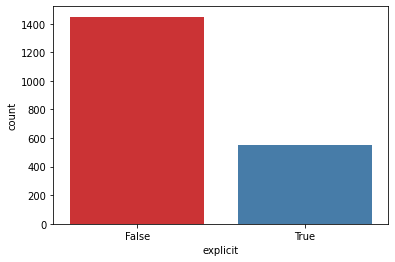

In [5]:
# make two columns (explicit and not explicit)
sns.countplot(x="explicit", data=song_data, palette="Set1")


### 2. What is the percentage of explicit songs in 1999?

In [6]:
year_ninetynine = song_data['year'] == 1999 # total songs from 1999
explicit_songs = song_data['explicit'] == True # explicit songs
ninetynine_songs = song_data[year_ninetynine & explicit_songs] # explicit songs from 99

len(ninetynine_songs)/len(year_ninetynine)*100 # percentage of explicit songs in 1999

0.4

### 3. What is the percentage of explicit songs in 2019?

In [7]:
year_nineteen = song_data['year'] == 2019 # total songs from 1999
explicit_songs = song_data['explicit'] == True # non-explicit songs
nineteen_songs = song_data[year_nineteen & explicit_songs] # explicit songs from 99

len(nineteen_songs)/len(year_nineteen)*100 # percentage of explicit songs in 1999

1.8499999999999999

### 4. Are explicit songs considered more popular than non-explicit songs throughout the years? 

<AxesSubplot:xlabel='year', ylabel='popularity'>

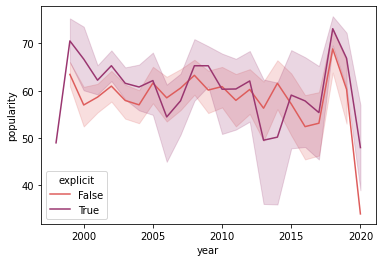

In [8]:
sns.lineplot(data=song_data, x="year", y="popularity", hue="explicit", palette="flare")

### 5. Which genres consist of higher numbers of Spotify Top Hits?

In [9]:
genre_count = {} # making dictionary of genres and their number of hits

for genre in song_data['genre'].unique():
    count = song_data[song_data['genre'] == genre].count().genre
    genre_count[genre] = count
    
sorted_genre_name = [] # sorted list of each genre's name
sorted_genre_count = [] # sorted list of each genre's number of top hits
for genre in sorted(genre_count, key=genre_count.get, reverse=True):
    sorted_genre_count.append(genre_count[genre])
    sorted_genre_name.append(genre)  
    
genre_data = {'Genres':sorted_genre_name, 'Number of Hit Songs': sorted_genre_count} # creating new data frame
genre_df = pd.DataFrame(genre_data)
genre_df.head(25)

,Genres,Number of Hit Songs
0,pop,428
1,"hip hop, pop",277
2,"hip hop, pop, R&B",244
3,"pop, Dance/Electronic",221
4,"pop, R&B",178
5,hip hop,124
6,"hip hop, pop, Dance/Electronic",78
7,rock,58
8,"rock, pop",43
9,Dance/Electronic,41


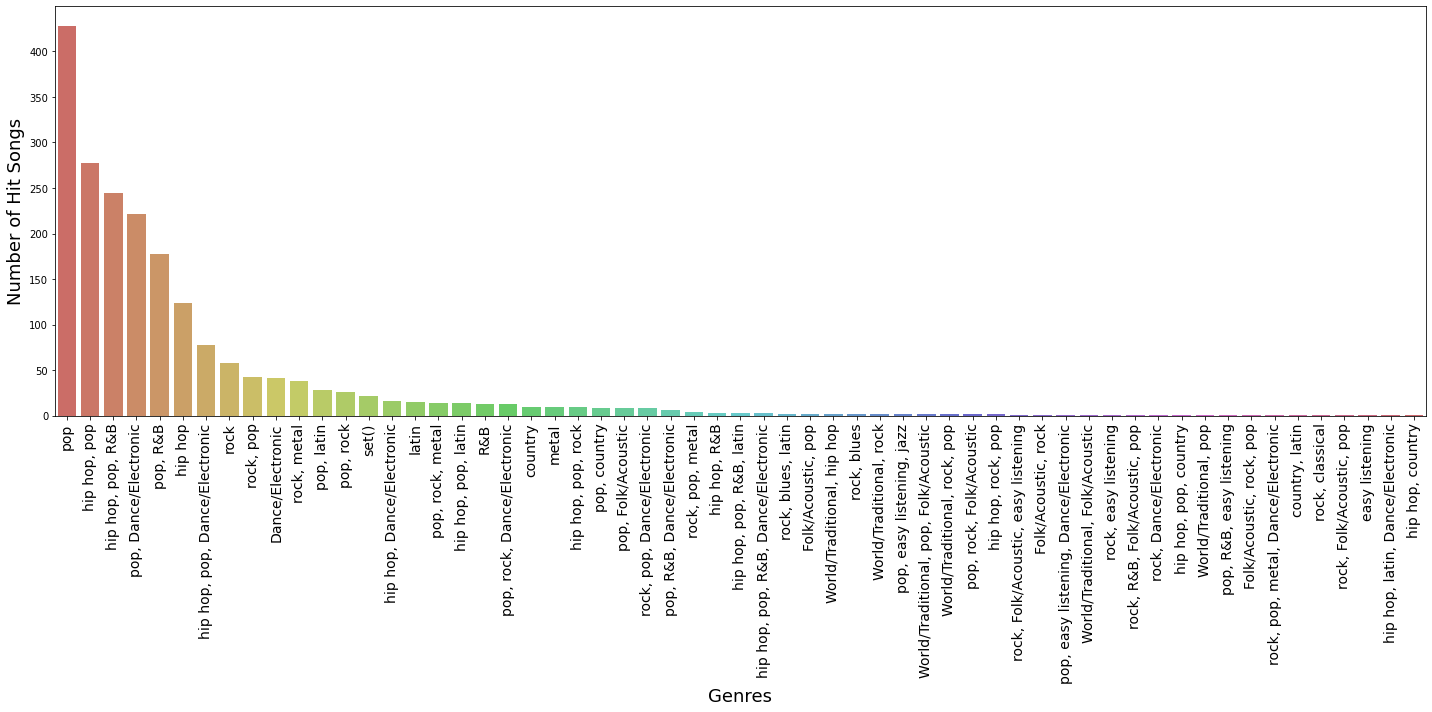

In [10]:
# Making bar plot 

top_genres = genre_df.iloc[:59] # getting top 15 artists

plt.figure(figsize=(20,10)) # larger figure

top_genres_plot = sns.barplot(x="Genres", y="Number of Hit Songs", palette = 'hls', data=top_genres)

top_genres_plot.set_xticklabels(top_genres_plot.get_xticklabels(), rotation=90, ha="center") # rotating ticks
top_genres_plot.set_xticklabels(top_genres_plot.get_xticklabels(), fontsize=14) # adjusting font size of ticks
plt.xlabel('Genres', fontsize=18); # changing x and y axis label font size
plt.ylabel('Number of Hit Songs', fontsize=18);

plt.tight_layout()
plt.show()

### 6. What is the average energy level of a Spotify Top Hit per year? 

<AxesSubplot:xlabel='year', ylabel='energy'>

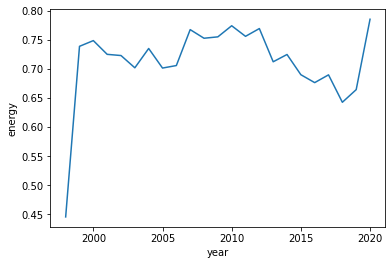

In [11]:
# calculate the average value across each year
avg_yearly_energy = song_data.groupby(by="year")["energy"].mean() 

# Creating new dataframe 
energy_data = {'energy': avg_yearly_energy}
energy_df = pd.DataFrame(energy_data)

# Visualization x axis years, y axis energy levels
sns.lineplot(data=energy_df, x="year", y="energy")

### 7. What is the average length of a Spotify Top Hit per year?

<AxesSubplot:xlabel='year', ylabel='song duration in ms'>

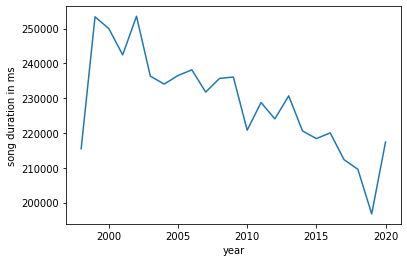

In [12]:
# calculate the average value across each year
avg_yearly_duration = song_data.groupby(by="year")["duration_ms"].mean() 

# Creating new dataframe 
duration_data = {'song duration in ms': avg_yearly_duration}
duration_df = pd.DataFrame(duration_data)

# Visualization x axis years, y axis song duration
sns.lineplot(data=duration_df, x="year", y="song duration in ms")

### 8. What is the average tempo rate of a Spotify Top Hit per year?

<AxesSubplot:xlabel='year', ylabel='tempo'>

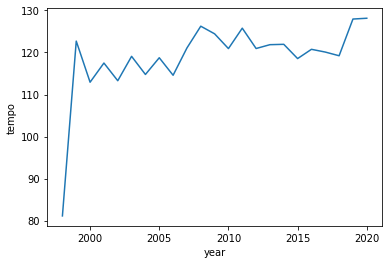

In [13]:
# calculate the average value across each year
avg_yearly_tempo = song_data.groupby(by="year")["tempo"].mean() 

# Creating new dataframe 
tempo_data = {'tempo': avg_yearly_tempo}
tempo_df = pd.DataFrame(tempo_data)

# Visualization x axis years, y axis tempo
sns.lineplot(data=tempo_df, x="year", y="tempo")

### 9. Which artists have the most Spotify Top Hits?

In [14]:
artist_count = {} # making dictionary of artists and their number of hits

for artist in song_data['artist'].unique():
    count = song_data[ song_data['artist'] == artist].count().artist
    artist_count[artist] = count
    
sorted_artist_name = [] # sorted list of each artist's name
sorted_artist_count = [] # sorted list of each artist's number of top hits
for artist in sorted(artist_count, key=artist_count.get, reverse=True):
    sorted_artist_count.append(artist_count[artist])
    sorted_artist_name.append(artist)  
    
data = {'Artist':sorted_artist_name, 'Number of Hit Songs': sorted_artist_count} # creating new data frame
artist_df = pd.DataFrame(data)
artist_df.head(25)

,Artist,Number of Hit Songs
0,Rihanna,25
1,Drake,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
5,David Guetta,18
6,Kanye West,17
7,Chris Brown,17
8,Beyoncé,16
9,Katy Perry,16


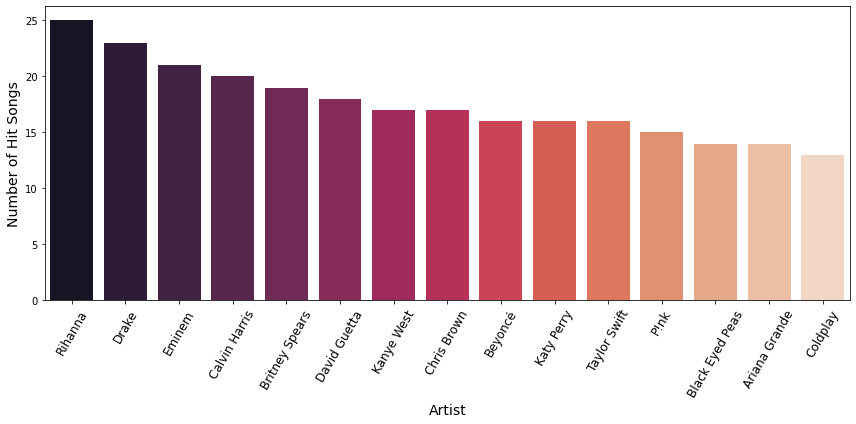

In [15]:
# Making bar plot 
top_artists = artist_df.iloc[:15] # getting top 15 artists

plt.figure(figsize=(12,6)) # larger figure

top_artists_plot = sns.barplot(x="Artist", y="Number of Hit Songs", palette = 'rocket', data=top_artists)

top_artists_plot.set_xticklabels(top_artists_plot.get_xticklabels(), rotation=60, ha="center") # rotating ticks
top_artists_plot.set_xticklabels(top_artists_plot.get_xticklabels(), fontsize=12) # adjusting font size of ticks

plt.xlabel('Artist', fontsize=14); # changing x and y axis label font size
plt.ylabel('Number of Hit Songs', fontsize=14);

plt.tight_layout()
plt.show()


## 10. How many artists have the least amount of Spotify Top Hits?

In [16]:
last_artists = artist_df[artist_df["Number of Hit Songs"]==1]

len(last_artists)

494

# Machine Learning Model: Logistic Regression

In [17]:
label_encoder = preprocessing.LabelEncoder()
encoded_mode = label_encoder.fit_transform(song_data["mode"]) # encoding mode data

model = linear_model.LogisticRegression(solver = 'lbfgs') 

model.fit(X = pd.DataFrame(encoded_mode), 
          y = song_data["explicit"]) # adding data

LogisticRegression()

In [18]:
predictions = model.predict_proba(X=pd.DataFrame(encoded_mode))
predictions = pd.DataFrame(predictions)
predictions.columns = ["Non_explicit_prob", "Explicit_prob"]

# Generating table
pd.crosstab(song_data["mode"], predictions.loc[:, "Explicit_prob"])


Explicit_prob,0.251088,0.295193
mode,,
0,893,0
1,0,1107


In [19]:
# adding more variables like popularity, danceability, and energy
encoded_popularity = label_encoder.fit_transform(song_data["popularity"])
encoded_danceability = label_encoder.fit_transform(song_data["danceability"])

song_features = pd.DataFrame([encoded_popularity, 
                              encoded_danceability, 
                              encoded_mode, 
                              song_data["energy"]]).T
song_features.head(25)

,0,1,2,3
0,63.0,386.0,0.0,0.834
1,65.0,85.0,1.0,0.897
2,52.0,168.0,1.0,0.496
3,64.0,186.0,0.0,0.913
4,51.0,249.0,0.0,0.928
5,55.0,341.0,1.0,0.888
6,72.0,553.0,0.0,0.661
7,54.0,343.0,1.0,0.772
8,61.0,348.0,0.0,0.678
9,63.0,355.0,1.0,0.808


In [20]:
model = linear_model.LogisticRegression(solver='lbfgs')
model.fit(X = song_features, 
          y = song_data["explicit"])
model.coef_

array([[ 0.00687496,  0.00461073,  0.30661368, -1.75265302]])

In [21]:
# making predictions
predictions = model.predict(X=song_features)

In [22]:
# making table
pd.crosstab(predictions,song_data["explicit"]) # predictions vs actual data from song_data

# In this ML model, there are 1408 true negatives, 254 true positives, 91 false positives, and 458 false negatives

explicit,False,True
row_0,,
False,1408,458
True,41,93


In [23]:
# Confusion matrix , prediction accuracy
model.score(X=song_features, y=song_data["explicit"])

0.7505